In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

In [69]:
data = pd.read_csv('diabetes_dataset.csv')

In [70]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,59,0,0,never,23.32,3.5,160,0
1,Female,72,0,0,never,29.55,5.8,220,1
2,Female,33,0,0,No Info,27.32,4.8,200,0
3,Female,14,0,0,never,18.06,6.1,145,0
4,Male,73,0,0,never,25.53,7.0,130,1


In [71]:
# EDA

In [72]:
data.shape

(21250, 9)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21250 entries, 0 to 21249
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               21250 non-null  object 
 1   age                  21250 non-null  int64  
 2   hypertension         21250 non-null  int64  
 3   heart_disease        21250 non-null  int64  
 4   smoking_history      21250 non-null  object 
 5   bmi                  21250 non-null  float64
 6   HbA1c_level          21250 non-null  float64
 7   blood_glucose_level  21250 non-null  int64  
 8   diabetes             21250 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.5+ MB


In [74]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000,21250.000000
mean,48.592988,0.133318,0.076471,28.937483,6.008866,157.296847,0.400000
std,22.040231,0.339926,0.265756,7.268683,1.266622,54.501733,0.489909
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,32.000000,0.000000,0.000000,25.400000,5.700000,126.000000,0.000000
50%,52.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.000000
75%,66.000000,0.000000,0.000000,32.000000,6.600000,160.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [75]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

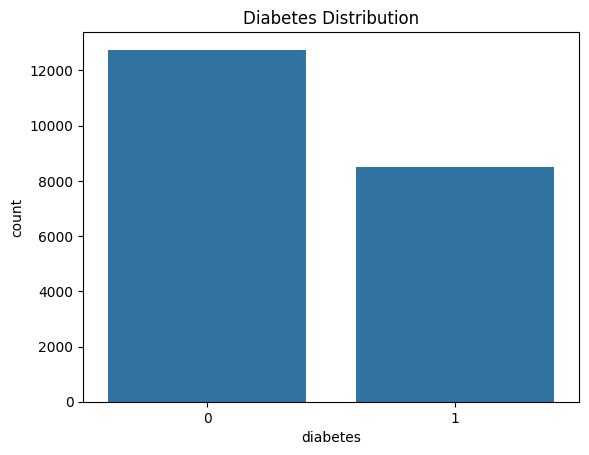

In [76]:
# Target Distribution

sns.countplot(x='diabetes', data=data)
plt.title("Diabetes Distribution")
plt.show()

In [77]:
# # Correlation Heatmap

# plt.figure(figsize=(10,6))

# numeric_data = data.select_dtypes(include=['int64', 'float64'])

# sns.heatmap(numeric_data.corr(), annot=True)
# plt.title("Correlation Heatmap")
# plt.show()

In [78]:
# Outlier Detection 

def checkOutliers(data, column):
    plt.figure(figsize=(30, 5))
    plt.subplot(1, 2, 1)
    plt.boxplot(data[column])
    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=data[column], kde=True)
    plt.axvline(data[column].mean()+3*data[column].std())
    plt.axvline(data[column].mean()-3*data[column].std())

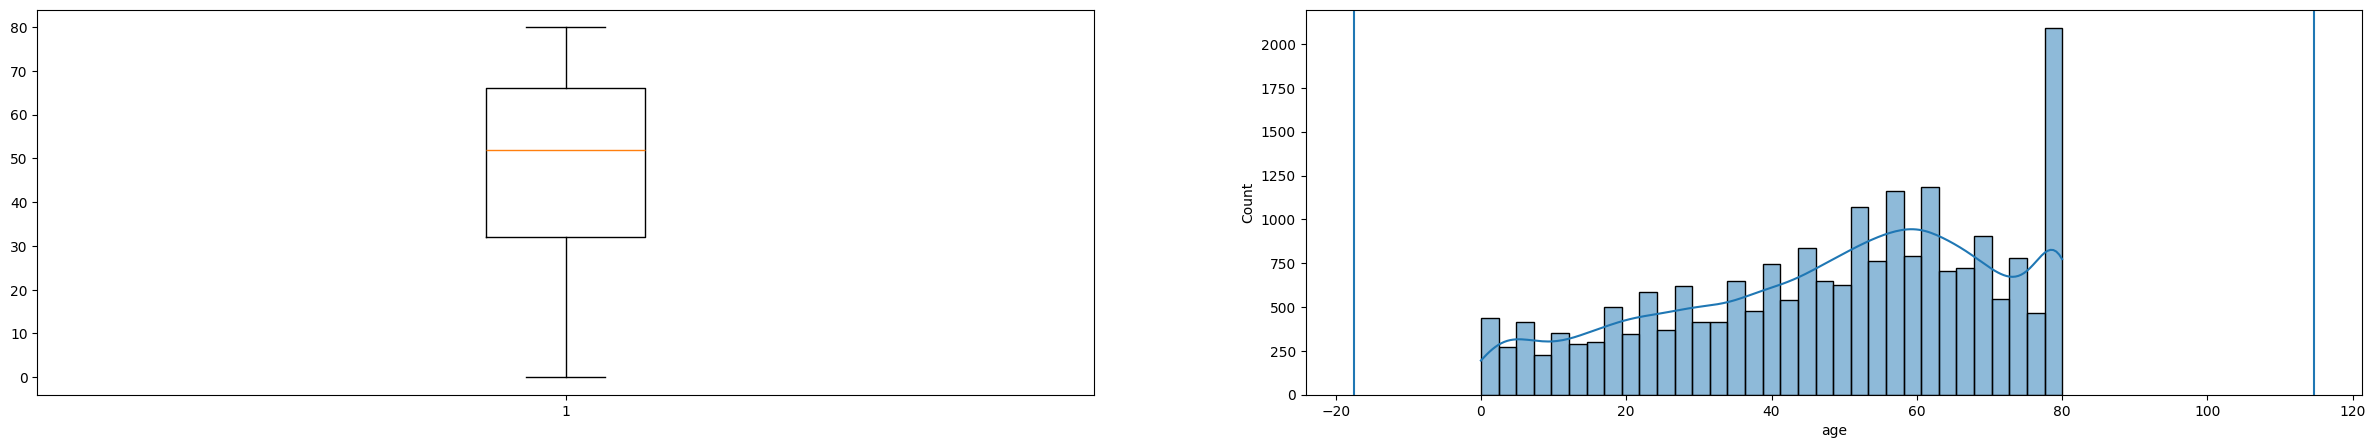

In [79]:
checkOutliers(data, "age")

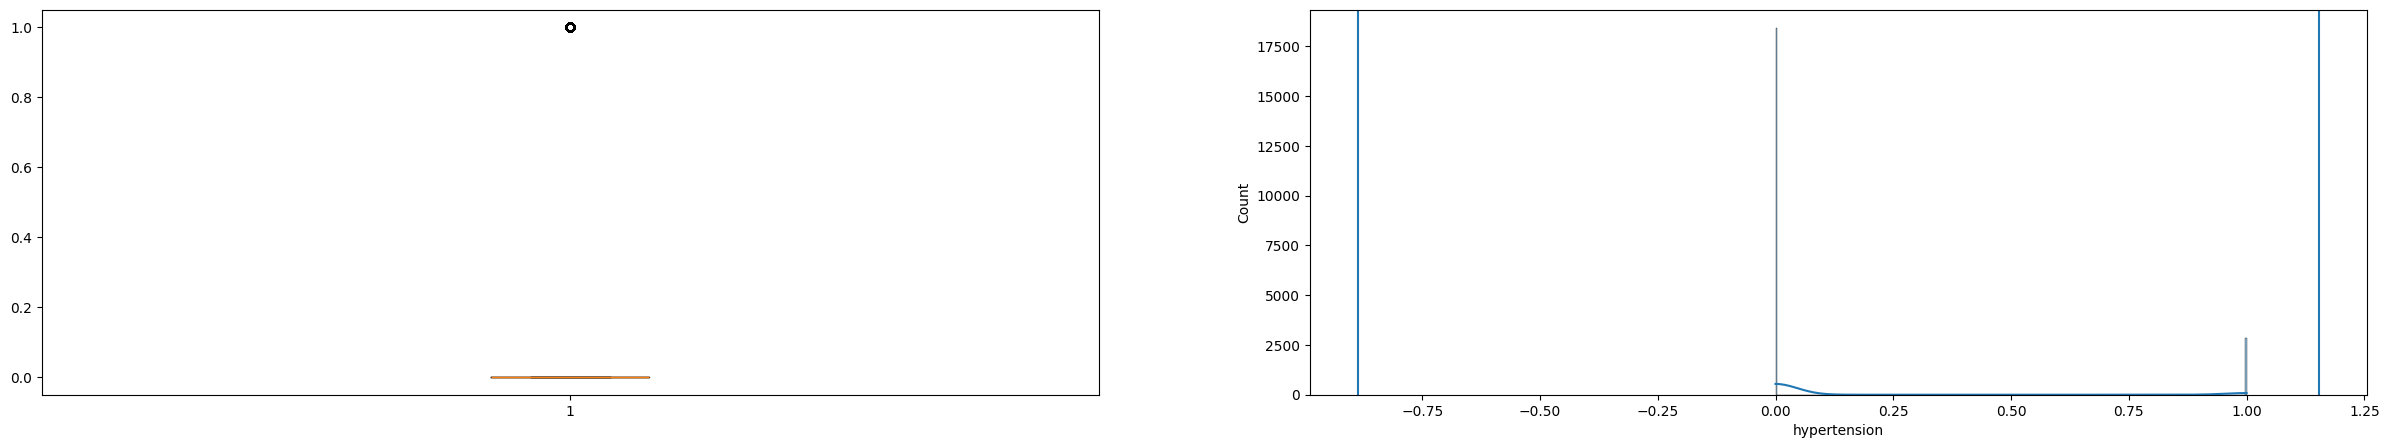

In [80]:
checkOutliers(data, "hypertension")

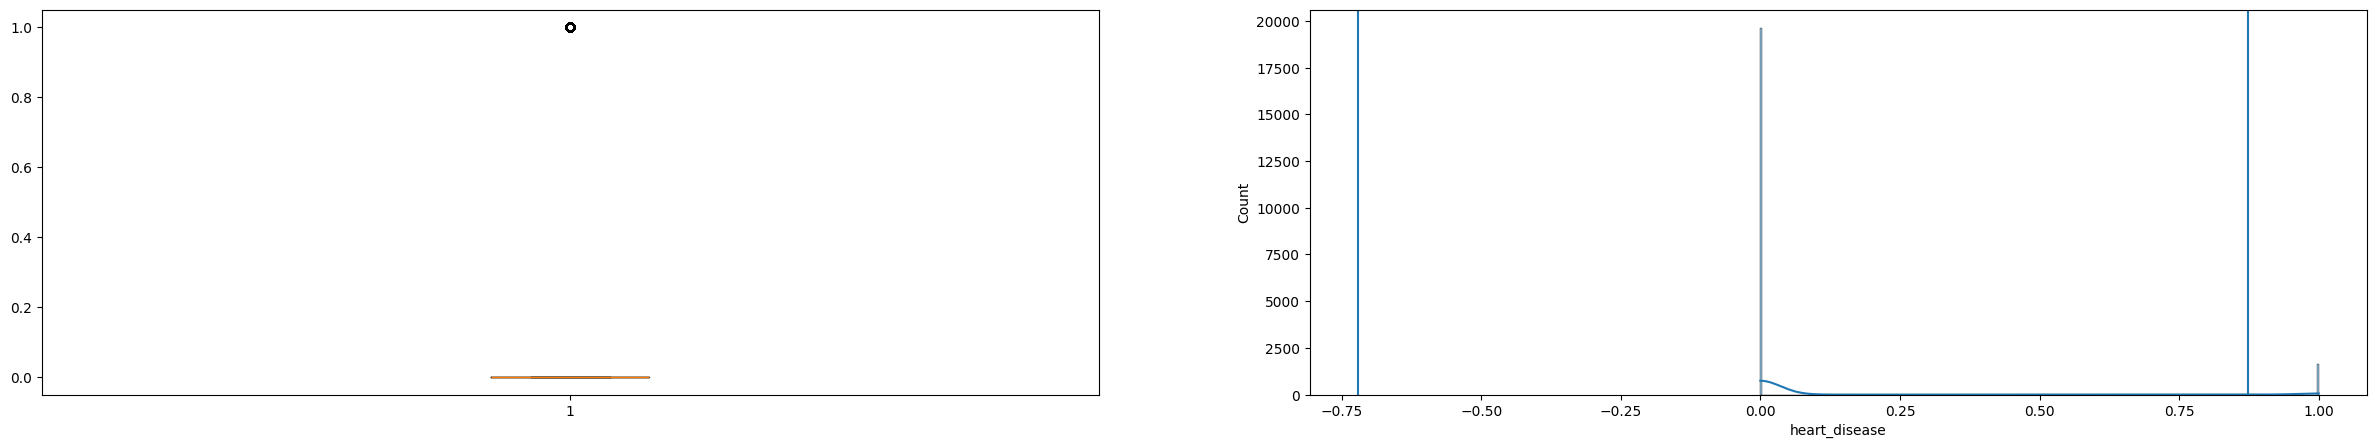

In [81]:
checkOutliers(data, "heart_disease")

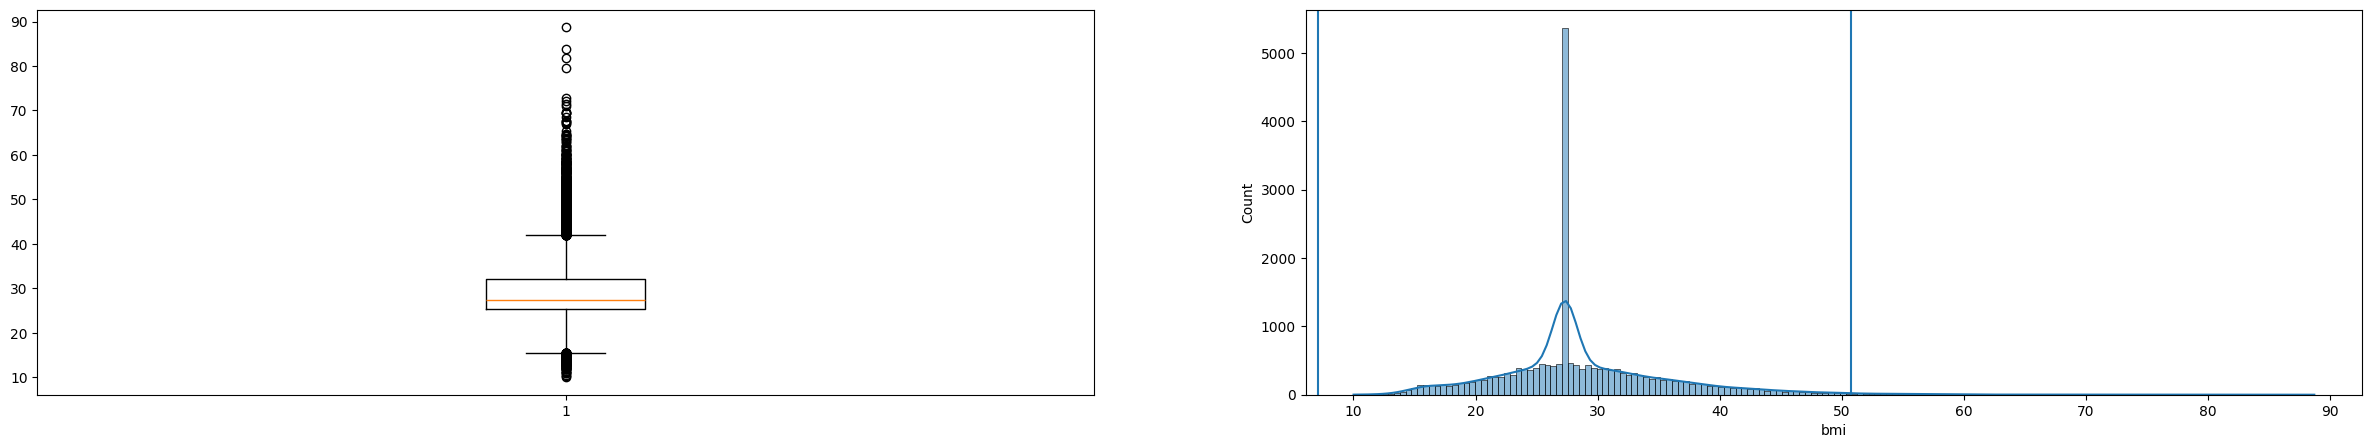

In [82]:
checkOutliers(data, "bmi")

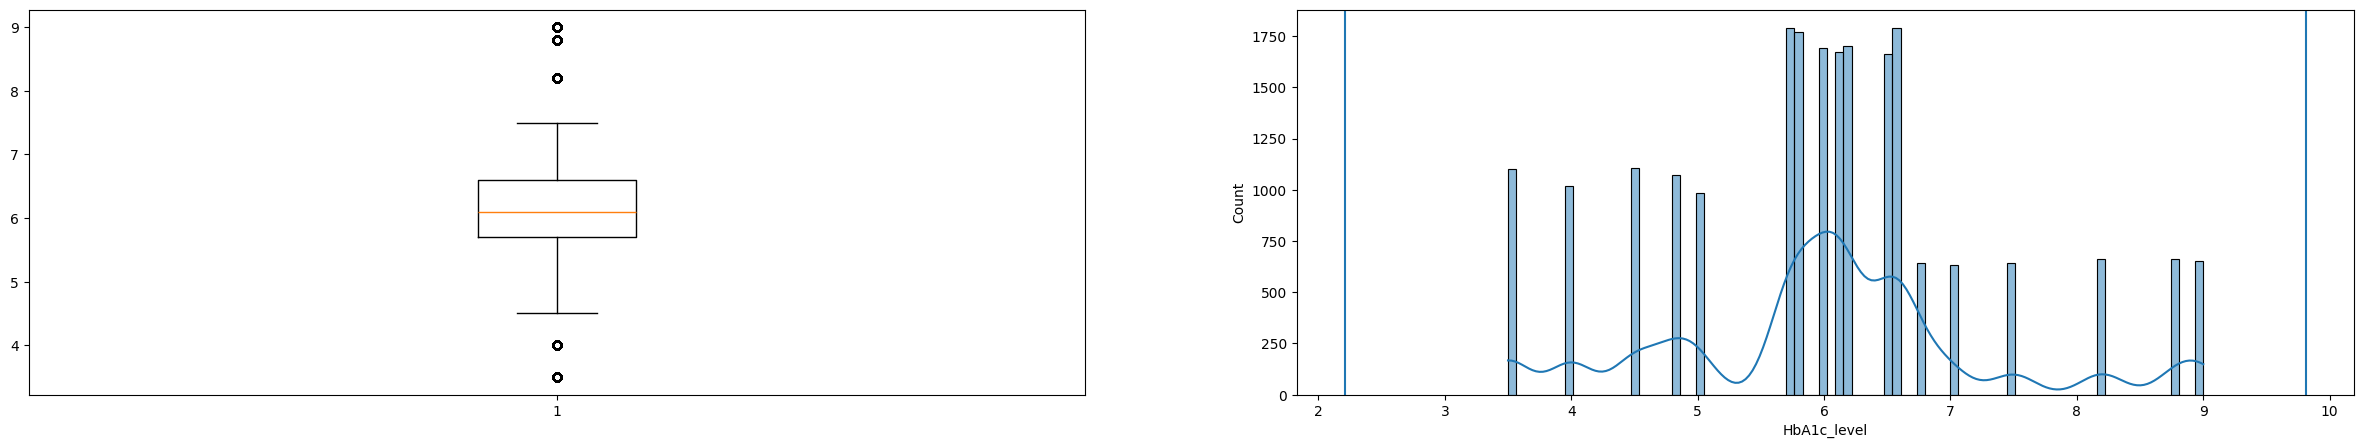

In [83]:
checkOutliers(data, "HbA1c_level")

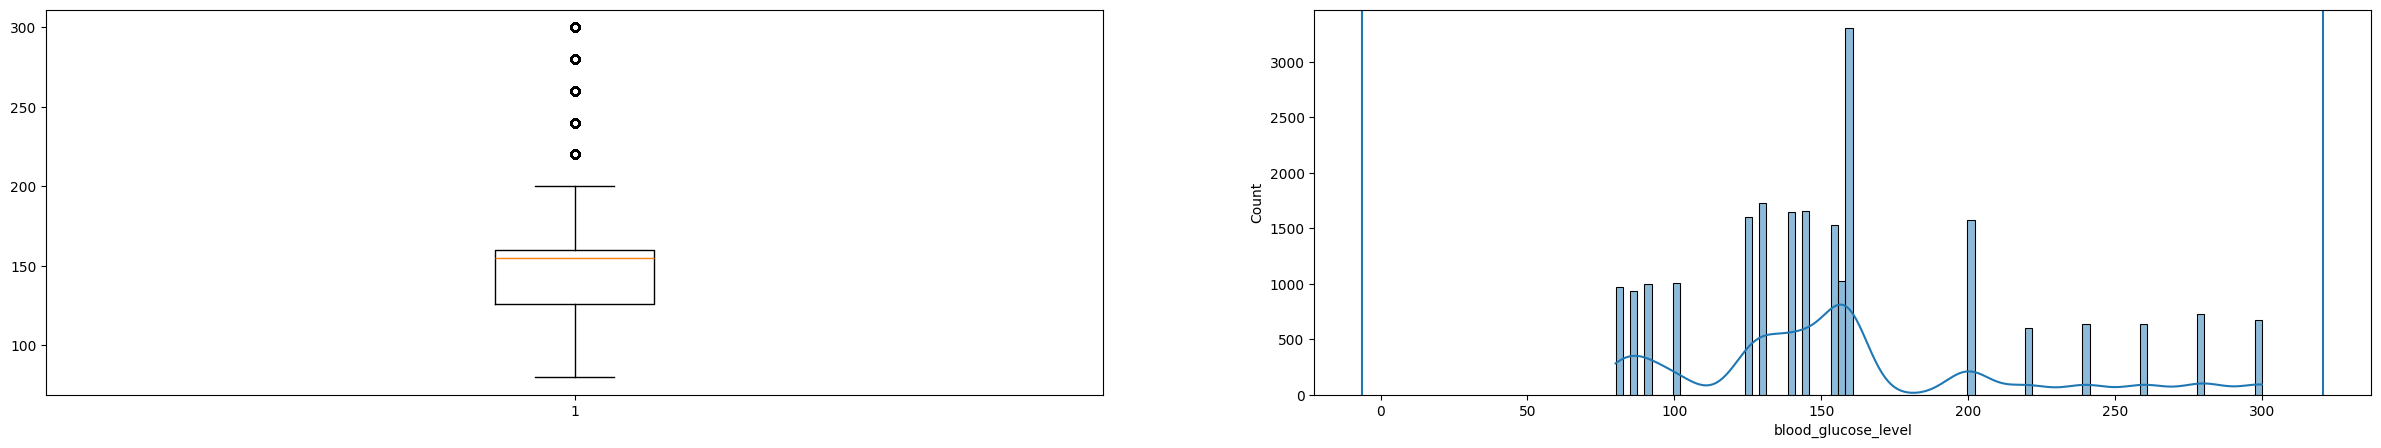

In [84]:
checkOutliers(data, "blood_glucose_level")

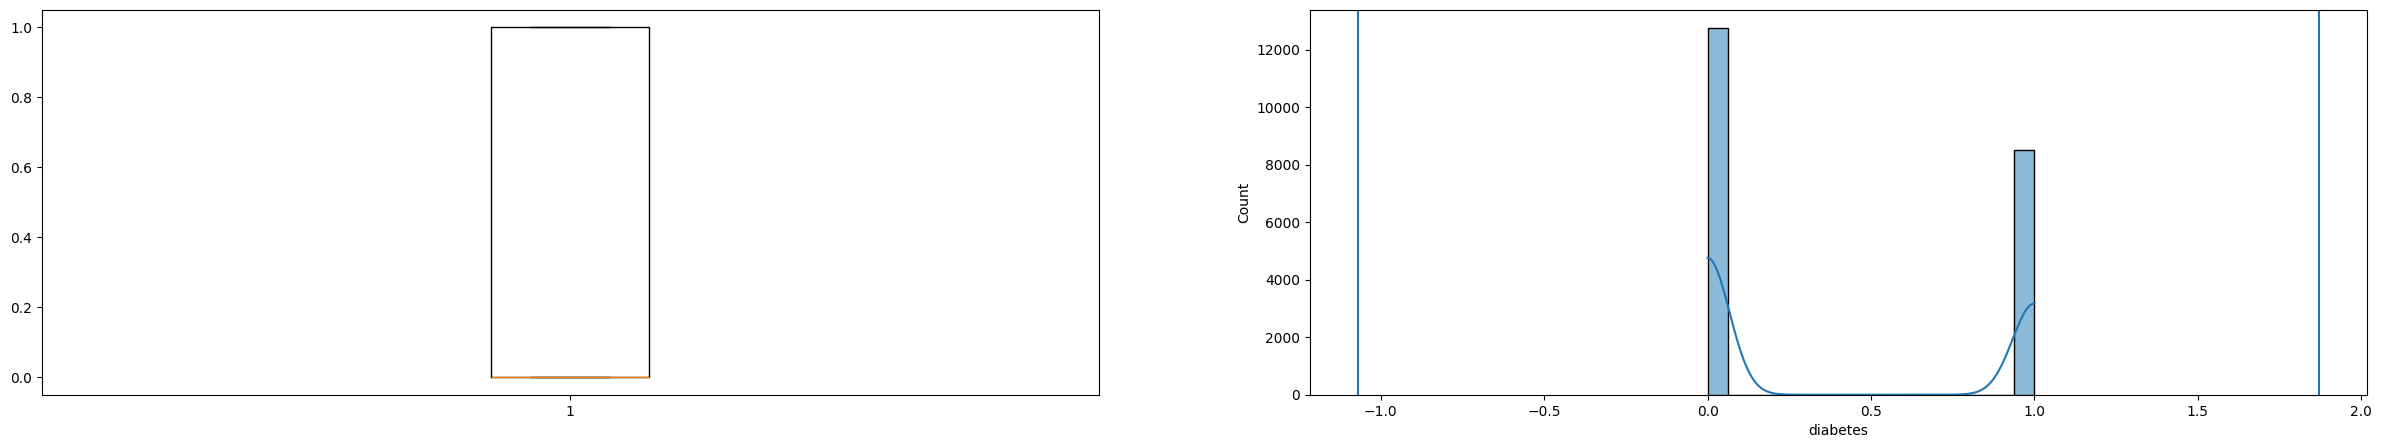

In [85]:
checkOutliers(data, "diabetes")

In [86]:
# Handle Outliers

def handleoutliers(data, column):
  
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
   
    IQR = Q3 - Q1
    
   
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
   
    data.loc[data[column]>upper_limit,column]=upper_limit
    data.loc[data[column]<lower_limit,column]=lower_limit

In [87]:
handleoutliers(data,"age")

In [88]:
handleoutliers(data,"hypertension")

In [89]:
handleoutliers(data,"heart_disease")

In [90]:
handleoutliers(data,"bmi")

In [91]:
handleoutliers(data, "HbA1c_level")

In [92]:
handleoutliers(data, "blood_glucose_level")

In [93]:
handleoutliers(data, "diabetes")

C:\Users\Ajinkya Suroshe\AppData\Local\Temp\ipykernel_8084\923765406.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[column]>upper_limit,column]=upper_limit


In [94]:
# Data Encoding

In [95]:
data['diabetes'] = data['diabetes'].astype(int)

In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])

In [165]:
# Split Features & Target

In [166]:
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

In [167]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [100]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
# Imbalanced data

data["diabetes"].value_counts()

diabetes
0    12750
1     8500
Name: count, dtype: int64

In [102]:
# Handle Imbalanced data

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [103]:
data['gender'].value_counts()

gender
0    12013
1     9234
2        3
Name: count, dtype: int64

In [104]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,59,0,0,4,23.32,4.35,160,0
1,0,72,0,0,4,29.55,5.80,211,1
2,0,33,0,0,0,27.32,4.80,200,0
3,0,14,0,0,4,18.06,6.10,145,0
4,1,73,0,0,4,25.53,7.00,130,1
...,...,...,...,...,...,...,...,...,...
21245,1,61,0,0,3,34.87,6.50,159,0
21246,0,46,0,0,0,27.32,6.00,158,0
21247,0,39,0,0,4,22.44,4.80,145,0
21248,1,26,0,0,0,27.32,6.50,80,0


In [105]:
# Correlation

<Axes: >

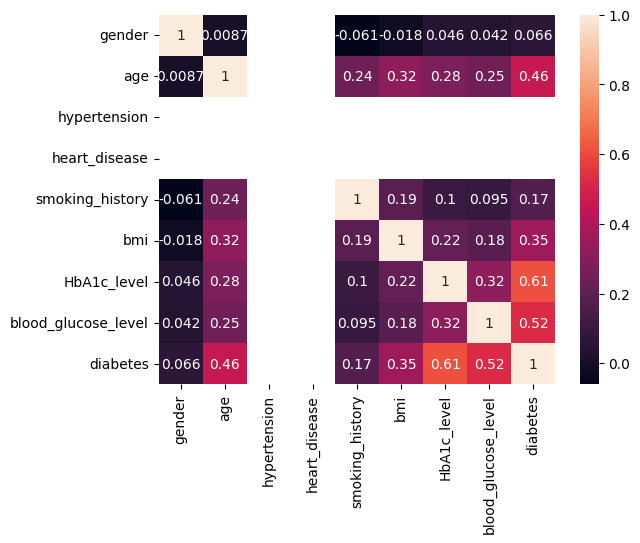

In [106]:
sns.heatmap(data.corr(),annot=True)

In [107]:
x = data.drop('diabetes', axis=1)
y = data['diabetes']

In [108]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [109]:
# Feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [110]:
# Imbalance data

data["diabetes"].value_counts()

diabetes
0    12750
1     8500
Name: count, dtype: int64

In [111]:
# Handle Imbalance Data

smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [112]:
print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
diabetes
0    8939
1    5936
Name: count, dtype: int64


In [113]:
print("After SMOTE:")
print(y_train_sm.value_counts())

After SMOTE:
diabetes
0    8939
1    8939
Name: count, dtype: int64


In [114]:
# Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10 ,   # helps reduce overfitting
    random_state=42
)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [170]:
# Evaluate Model

In [171]:
from sklearn.metrics import accuracy_score

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, test_pred))

Training Accuracy: 0.912672268907563
Testing Accuracy: 0.9083921568627451


In [172]:
print(confusion_matrix(y_test, y_pred))

[[3587  224]
 [ 360 2204]]


In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3811
           1       0.91      0.86      0.88      2564

    accuracy                           0.91      6375
   macro avg       0.91      0.90      0.90      6375
weighted avg       0.91      0.91      0.91      6375



In [174]:
# Cross Validate

In [175]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross Validation Accuracy:", cv_scores.mean())

Cross Validation Accuracy: 0.9039327731092437


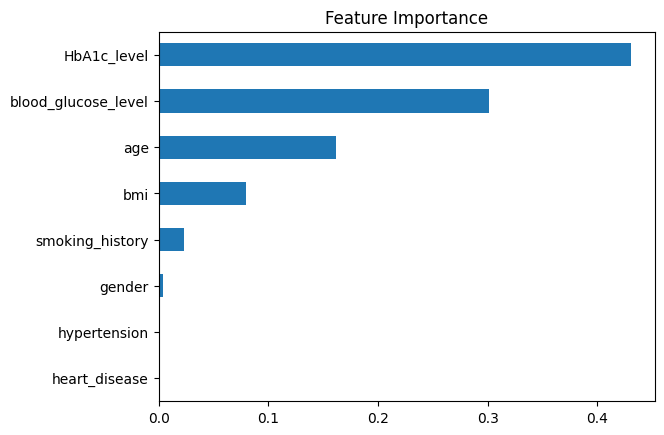

In [176]:
# Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [177]:
# Save Model & Scaler

import pickle

with open("diabetes.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [178]:
# Test Saved Model

with open("diabetes.pkl", "rb") as f:
    loaded_model = pickle.load(f)

sample = X_test[0:1]
print("Prediction:", loaded_model.predict(sample))

Prediction: [1]


In [162]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,59,0,0,4,23.32,4.35,160,0
1,0,72,0,0,4,29.55,5.80,211,1
2,0,33,0,0,0,27.32,4.80,200,0
3,0,14,0,0,4,18.06,6.10,145,0
4,1,73,0,0,4,25.53,7.00,130,1


In [163]:
data.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
21245,1,61,0,0,3,34.87,6.5,159,0
21246,0,46,0,0,0,27.32,6.0,158,0
21247,0,39,0,0,4,22.44,4.8,145,0
21248,1,26,0,0,0,27.32,6.5,80,0
21249,1,74,0,0,0,28.89,7.0,159,1
